# Comandos para realização do trabalho da matéria de NLP com uso da biblioteca SKlearn e NLTK.

## <font color=red>Observação importante:</font>

<font color=red>Trabalho realizado com uso de corpus diferente do Fake.br não será aceito!</font>

## Carregando arquivos `pre-processed.csv`, de imagem e de funções auxiliares para dentro do Google Colab

In [1]:
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP

--2025-11-15 21:28:46--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  --.-KB/s    in 0.09s   

2025-11-15 21:28:46 (220 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 1.27 MiB | 22.10 MiB/s, done.
Resolving deltas: 100% (9/9), done.
mv: cannot move './NLP/data' to './data': Directory

## Instalação manual das dependências para uso do SKlearn e do NLTK no Google Colab

In [2]:
import pandas as pd
import nltk
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import unicodedata
import re
from nltk.stem import RSLPStemmer
from sklearn.linear_model import LogisticRegression
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [3]:
from pathlib import Path
print("Pathlib imported successfully.")

Pathlib imported successfully.


## Criar dataframe do CSV utilizando o método read_csv do pandas

In [4]:
df = pd.read_csv('pre-processed.csv')

# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

  1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [5]:
stopwords_pt = set(nltk.corpus.stopwords.words('portuguese'))
regex_num = re.compile(r'\d+')
stemmer = RSLPStemmer()
MAX_LEN = 50 # valor para truncamento

def pipeline(text):

    # 1.1 tokenizar
    tokens = nltk.word_tokenize(text)

    # 1.2 remover acentos, números e pontuações
    clean = []
    for word in tokens:
        w = unicodedata.normalize("NFKD", word).encode("ascii", "ignore").decode()
        w = regex_num.sub("", w)
        if w.isalpha():  # mantém só letras
            clean.append(w)

    # 1.3 minúsculas
    clean = [w.lower() for w in clean]

    # 1.4 remove stopwords
    clean = [w for w in clean if w not in stopwords_pt]

    # 1.5 stem
    clean = [stemmer.stem(w) for w in clean]

    # 1.6 truncamento
    clean = clean[:MAX_LEN]

    # 1.7 remontar notícias em string
    final_string = " ".join(clean)

    return clean, final_string

processed_data = df["preprocessed_news"].apply(pipeline)
df["processed_tokens"] = processed_data.apply(lambda x: x[0])
df["processed_news"] = processed_data.apply(lambda x: x[1])


# 2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

# usa sua coluna já processada
corpus = df["processed_news"].astype(str)

# cria o vetorizador
tfidf = TfidfVectorizer(
    ngram_range=(1, 3),        # 1, 2 e 3 palavras
    lowercase=False,
)

# ajusta e transforma
X_tfidf = tfidf.fit_transform(corpus)

# nomes das features (ngramas)
features = tfidf.get_feature_names_out()

print("Formato da matriz TF-IDF:", X_tfidf.shape)

# 3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

# Convert 'fake' and 'true' labels to 0 and 1 respectively
y = df["label"].map({'fake': 0, 'true': 1})                       # rótulos (fake / true) -> (0 / 1)

# divisão 75% treino e 25% teste
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.25,       # 25% para teste
    random_state=42,      # random_state = 42
    stratify=y            # mantém proporção das classes de treino e teste
)

print("Treino:", X_train.shape[0])
print("Teste:", X_test.shape[0])

# 4. Fazer regressão logística com solver = 'lbfgs'.

# Criação do modelo
log_reg = LogisticRegression(
    solver='lbfgs',     # algoritmo de otimização
    max_iter=1000,      # aumenta iterações (evita warning de convergência)
    n_jobs=-1,          # usa todos os núcleos do processador
    random_state=42
)

# Treinamento (X_train = matrizes TF-IDF, y_train = rótulos)
log_reg.fit(X_train, y_train)

# Predições
y_pred = log_reg.predict(X_test)

# 5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

# Prever probabilidades
y_proba = log_reg.predict_proba(X_test)

prob_fake = y_proba[:, 0]

# Probabilidade de real
prob_real = y_proba[:, 1]


# 6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

# Converter probabilidades em classes
y_pred_from_proba = (prob_real >= 0.5).astype(int)

# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred_from_proba)

print("Acurácia usando predict_proba:", accuracy)


Formato da matriz TF-IDF: (7200, 531983)
Treino: 5400
Teste: 1800
Acurácia usando predict_proba: 0.8555555555555555


## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras


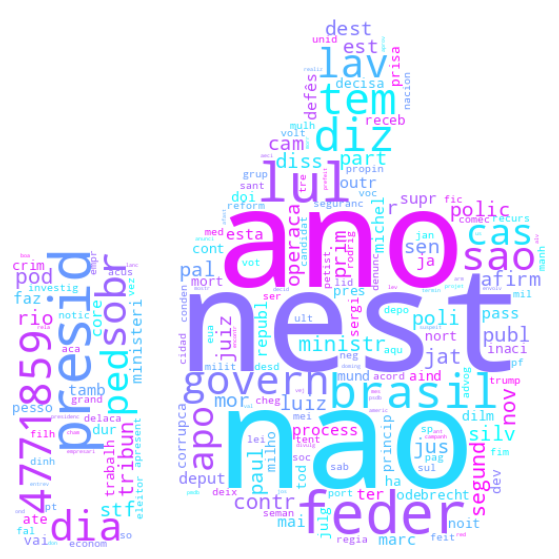

In [16]:
# 1. Separar textos verdadeiros e falsos

# Use 'processed_tokens' column which contains lists of tokens
true_tokens_lists  = df[df["label"] == 'true']["processed_tokens"]
false_tokens_lists = df[df["label"] == 'fake']["processed_tokens"]

# 2. Criar dicionário de frequências para VERDADEIROS

# junta todas as listas de tokens em uma lista só
true_all_tokens = [token for sublist in true_tokens_lists for token in sublist]

# cria o dicionário {token: frequência}
freq_true = dict(Counter(true_all_tokens))

# adicionando o RU 4771859
freq_true['4771859'] = 1000

# 3. Função fornecida: gerar_nuvem_palavras

def gerar_nuvem_palavras(dic_freq, arquivo_mascara=None):
    mask_image = None
    if arquivo_mascara:
        img = plt.imread(arquivo_mascara)
        if img.dtype == np.float32 or img.dtype == np.float64:
            mask_image = (img * 255).astype(np.uint8)
        else:
            mask_image = img

    wc = WordCloud(
        width=1200,
        height=600,
        background_color="white",
        mask=mask_image,
        colormap="cool"
    )
    wc.generate_from_frequencies(dic_freq)

    plt.figure(figsize=(14,7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# 5. Gerar nuvem de palavras dos textos VERDADEIROS

gerar_nuvem_palavras(freq_true, arquivo_mascara='/content/data/img/thumbs_up_mask.png')


## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

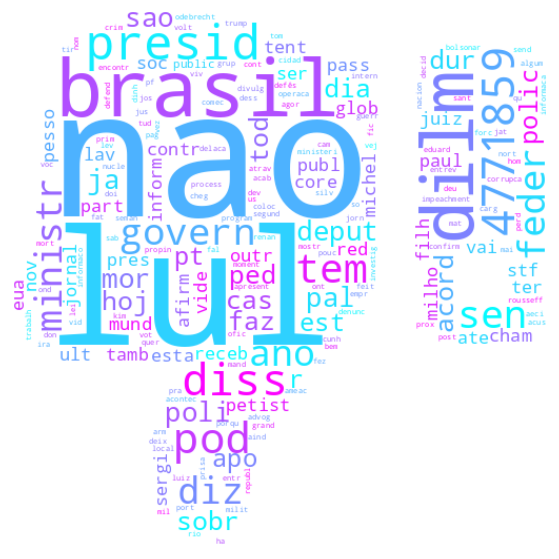

In [17]:
false_all_tokens = [token for sublist in false_tokens_lists for token in sublist]
freq_false = dict(Counter(false_all_tokens))
# adicionando o RU 4771859
freq_false['4771859'] = 1000

gerar_nuvem_palavras(freq_false, arquivo_mascara='/content/data/img/thumbs_down_mask.png')

---

# Material Complementar

## Alguns exemplos de uso da função auxiliar
`gerar_nuvem_palavras(dicionario_tokens_e_frequencia, arquivo_mascara)`

Gera uma nuvem de palavras com base em seu dicionário de palavras ou ngramas
    como a chave e a frequência de aparição do token como valor (inteiro).

    Parâmetros:
        dicionario_tokens_e_frequencia (dict): O dicionário de tokens e suas
                                               respectivas frequências de
                                               aparição nos textos.
        arquivo_mascara (str): O nome do arquivo da imagem de máscara. Pde ser:
                                            cloud_mask.png
                                            mapa_brasil_mask.png
                                            thumbs_up_mask.png        
                                            thumbs_down_mask.png
                                            <Outro arquivo de sua escolha>

    Exemplos de Uso:
        1. Para gerar uma nuvem de palavras na máscara mapa do brasil:
            gerar_nuvem_palavras(dicionario_tokens_e_frequencia=word_dict,
                                 arquivo_mascara='mapa_brasil_mask.png')

In [8]:
# Exemplo com dicionário de tokens unigramas e multigramas com frequências
words_dict = {'Olá aluno':1,
              'ALTERAR':4,
              'bigramas aqui':2,
              'palavras distintas de exemplo':2,
              'Para criar sua nuvem de palavras':1,
              'você deve gerar um dicionário':2,
              'de frequências de palavras e tokens':1}
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                     arquivo_mascara="mapa_brasil_mask.png")

TypeError: gerar_nuvem_palavras() got an unexpected keyword argument 'dicionario_tokens_e_frequencia'

In [ ]:
# Exemplo com uma frase completa
texto = """Exemplo: Gerar uma nuvem de palavras usando texto completo você deve
           primeiro separar ele um um ou mais tokens, para só depois vetorizar.
           Ao vetorizar você terá a bag of words, que te permitirá contar
           quantas vezes cada palavra ou grupo de palavras aparecem no texto.
           Por fim, basta criar um dicionário contendo a chave como o seu token
           e o valor como a frequência de aparição deste tokem."""
# Vetorização e contagem de frequência simples de bigramas:
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform([a+' '+b for a,b in (ngrams(texto.split(),2))])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_dict = dict(words_freq)
print(words_dict)

gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                      arquivo_mascara='thumbs_up_mask.png')